Problem Statement:
The objective of this project is to segment mall customers into distinct groups based on their purchasing behavior using K-Means clustering, enabling targeted marketing strategies.


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('/content/Mall_Customers 2.csv')
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
X = df.iloc[:, [3, 4]].values

In [7]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [8]:
print("Cluster centers:\n",kmeans.cluster_centers_)
print("Labels for each data point \n",kmeans.labels_)

Cluster centers:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]
Labels for each data point 
 [3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


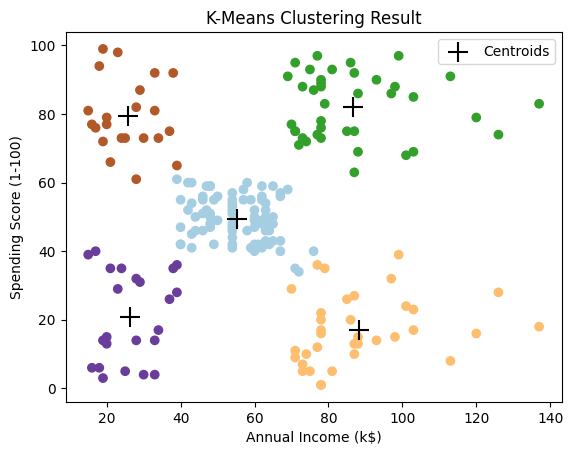

In [9]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='+', c='black', s=200, label="Centroids")
plt.title("K-Means Clustering Result")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


In [10]:
import pandas as pd

centroids = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=['Annual Income', 'Spending Score']
)

centroids


,Annual Income,Spending Score
0,55.296296,49.518519
1,86.538462,82.128205
2,88.200000,17.114286
3,26.304348,20.913043
4,25.727273,79.363636


In [11]:
cluster_labels = {
    0: "Premium Customers",
    1: "Low-Value Customers",
    2: "Potential Customers",
    3: "Impulsive Customers",
    4: "Average Customers"
}


In [16]:
df['Cluster'] = kmeans.labels_
df['Customer Segment'] = df['Cluster'].map(cluster_labels)




Cluster 0: Premium Customers (High income, high spending)

Cluster 1: Potential Customers (High income, low spending)

Cluster 2: Impulsive Customers (Low income, high spending)

Cluster 3: Low-Value Customers (Low income, low spending)

Cluster 4: Average Customers (Medium income, medium spending)

In [ ]:
import pickle
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

print("✅ Model saved successfully as kmeans_model.pkl")

✅ Model saved successfully as kmeans_model.pkl
